In [1]:
import seaborn as sns
import metapack as mp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display 

%matplotlib inline
sns.set_context('notebook')
mp.jupyter.init()


In [2]:
pkg = mp.jupyter.open_package()
#pkg = mp.jupyter.open_source_package()
pkg

In [3]:
assets = pkg.reference('assets').dataframe()
locations = pkg.reference('locations').dataframe()
prk = pkg.reference('parking_events').dataframe()

prk.columns  = [e.lower() for e in prk.columns]


In [4]:
prk_loc = prk.merge(locations, on='locationuid')
df = prk_loc[prk_loc.community_name == 'Downtown'].copy()

In [62]:
prk_loc.community_name.value_counts().head(25)

Downtown                              9477418
Uptown                                1438554
Greater North Park                    1186693
Mid-City:Eastern Area                  760614
Skyline-Paradise Hills                 454647
Greater Golden Hill                    269607
College Area                           266956
Ocean Beach                            233634
Mid-City:Normal Heights                212063
Pacific Beach                          200115
Mira Mesa                              183092
Mid-City:Kensington-Talmadge           182035
Encanto Neighborhoods,Southeastern     149660
Mid-City:City Heights                  139941
Navajo                                 123328
Carmel Valley                          116767
La Jolla                               103292
University                              92917
Balboa Park                             88510
Clairemont Mesa                         87802
Linda Vista                             79106
Pacific Highlands Ranch           

In [13]:
dfu = prk_loc[prk_loc.community_name == 'Uptown'].copy()
dfnp = prk_loc[prk_loc.community_name == 'Greater North Park'].copy()
dfgh = prk_loc[prk_loc.community_name == 'Greater Golden Hill'].copy()

In [21]:
dfsky = prk_loc[prk_loc.community_name == 'Skyline-Paradise Hills'].copy()
dfmid = prk_loc[prk_loc.community_name == 'Mid-City:Eastern Area'].copy()
dfpb = prk_loc[prk_loc.community_name == 'Pacific Beach'].copy()

In [63]:
dflj = prk_loc[prk_loc.community_name == 'La Jolla'].copy()
dfunv = prk_loc[prk_loc.community_name == 'University'].copy()
dfprk = prk_loc[prk_loc.community_name == 'Balboa Park'].copy()

In [5]:
df['month'] = df.time.apply( lambda v: v.date().replace(day=15))
df['flow'] = df.delta_norm.apply( lambda v : 1 if v > 0 else -1  )

Text(0.5, 0.98, 'Parking Flow By Hour of Day and Month of Data')

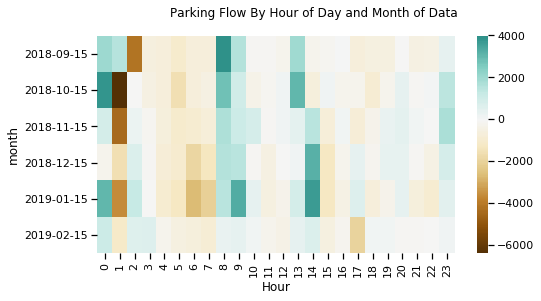

In [6]:

from matplotlib.pyplot import xticks, xlabel, suptitle
t = df.groupby([df.month, df.time.dt.hour]).sum()
fig, ax = plt.subplots(figsize=(8, 4)) 
ax = sns.heatmap(t[['delta_norm']].unstack(), ax=ax, cmap="BrBG", center=0);
locs, labels = xticks()
xticks(locs, [ f'{e}' for e in range(24)]);
xlabel("Hour");
suptitle("Parking Flow By Hour of Day and Month of Data")

Text(0.5, 0.98, 'Parking Flow By TIme of Day and Month of Data')

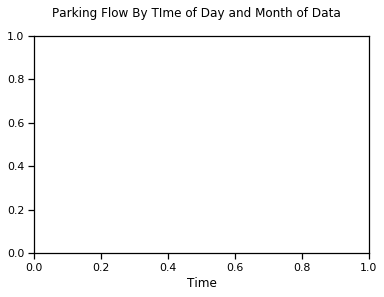

In [7]:
from matplotlib.pyplot import xticks, xlabel, suptitle
t = df.groupby([df.month, df.time.dt.time]).sum()

ax = sns.heatmap(t[['delta_norm']].unstack(), ax=ax, cmap="BrBG");
locs, labels = xticks()
#xticks(locs, [ f'{e}' for e in range(24)]);
xlabel("Time");
suptitle("Parking Flow By TIme of Day and Month of Data")

Text(0.5, 0.98, 'Parking Flow By Time of Day and Month of Data\nDowntown Community')

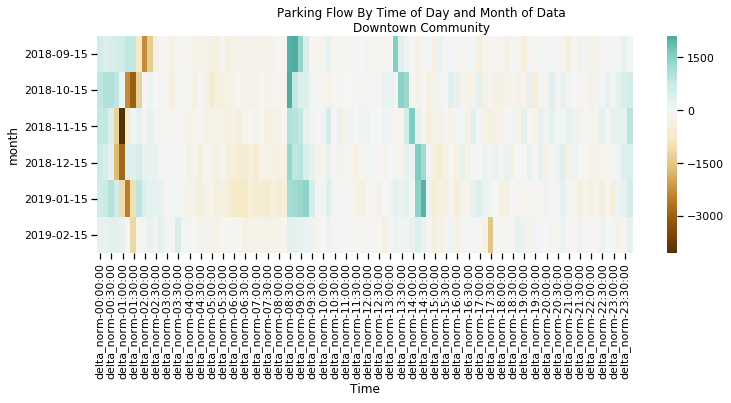

In [8]:
from matplotlib.pyplot import xticks, xlabel, suptitle
t = df.groupby([df.month, df.time.dt.time]).sum()
t['flow'] = t.delta_norm.apply( lambda v : 1 if v > 0 else -1  )
fig, ax = plt.subplots(figsize=(12, 4)) 
ax = sns.heatmap(t[['delta_norm']].unstack(), ax=ax, cmap='BrBG', center=0);
locs, labels = xticks()
#xticks(locs, [ f'{e}' for e in range(24)]);
xlabel("Time");
suptitle("Parking Flow By Time of Day and Month of Data\nDowntown Community")

In [49]:
def month_time_plot(df, ax = None, community=''):
    from matplotlib.pyplot import xticks, xlabel, suptitle
    x = df
    x['month'] = x.time.apply( lambda v: v.date().replace(day=15))
    t = x.groupby([x.month, x.time.dt.time]).sum()
    t['flow'] = t.delta_norm.apply( lambda v : 1 if v > 0 else -1  )
    if ax is None:
        fig, ax = plt.subplots(figsize=(12, 4)) 
    ax = sns.heatmap(t[['delta_norm']].unstack(), ax=ax, cmap='BrBG', center=0);
    locs, labels = xticks()
    xticks(locs, [ f"{h:2d}:{m:02d}" for h in range(24)  for m in (0,30)]);
    ax.set_xlabel("Time");
    ax.set_title("Parking Flow By Time of Day and Month of Data\n{}".format(community));

In [ ]:
fig, axes = plt.subplots(6,1, figsize=(12,24), sharex=True, sharey=True)
axes = axes.ravel()

month_time_plot(dfpb, axes[0],'Pacific Beach')
month_time_plot(dfnp, axes[1],'North Park')
month_time_plot(dfgh, axes[2],'Golden Hill')
month_time_plot(dfsky, axes[3],'Skyline')
month_time_plot(dfmid, axes[4],'Midcity')
month_time_plot(dflj, axes[0],'La Jolla')
month_time_plot(dfunv, axes[1],'University')
month_time_plot(dfprk, axes[2],'Balboa Park')
month_time_plot(df, axes[5],'Downtown')

plt.tight_layout()

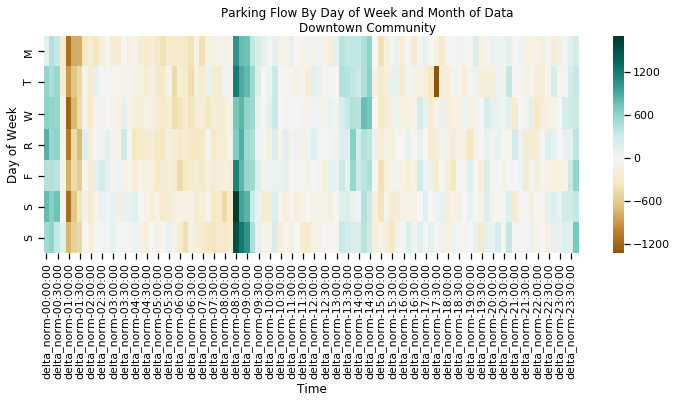

In [9]:
from matplotlib.pyplot import xticks, yticks, xlabel, ylabel, suptitle
t = df.groupby([df.time.dt.dayofweek, df.time.dt.time]).sum()
t['flow'] = t.delta_norm.apply( lambda v : 1 if v > 0 else -1  )
fig, ax = plt.subplots(figsize=(12, 4)) 
ax = sns.heatmap(t[['delta_norm']].unstack(), ax=ax, cmap='BrBG', center=0);
locs, labels = yticks()
yticks(locs, list("MTWRFSS"));
xlabel("Time");
ylabel("Day of Week")
suptitle("Parking Flow By Day of Week and Month of Data\nDowntown Community");


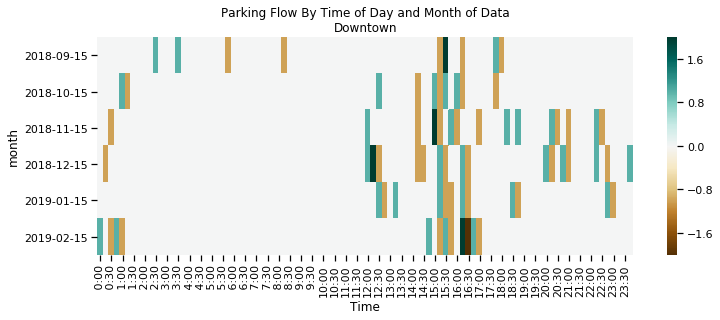

In [59]:
# Residential section of Soledad Mountain Road
month_time_plot(prk_loc[prk_loc.locationuid.isin(['vdorekhgqzjgzv6tpw','g8lswmtn3pujgzv17ul'])].copy(),
                community='Downtown')

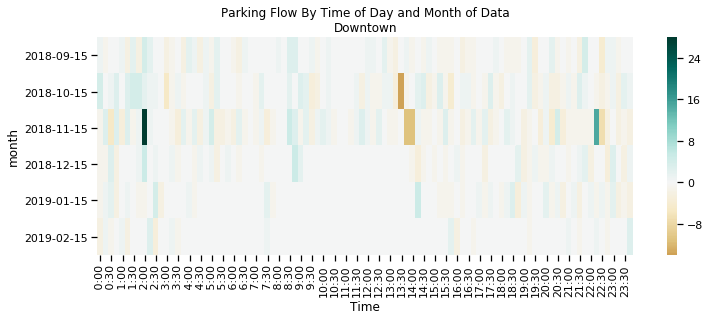

In [60]:
#  Regents road near La Jolla COlony
month_time_plot(prk_loc[prk_loc.locationuid.isin(['n1i27hhjxgjhwg95ru','7lio4wkir2ejhwg7bs2'])].copy(),
                community='Downtown')